# Time Series Forecasting with RNN using TensorFlow & Keras - Appliances Energy Dataset

A Recurrent Neural Network (RNN) is a type of neural network well-suited to time series data. RNNs process a time series step-by-step, maintaining an internal state summarizing the information they've seen so far.  In this example, I will use a specialized RNN layer called Long Short Term Memory (LSTM).

Long short-term memory (LSTM) is an artificial recurrent neural network (RNN) architecture used in the field of deep learning. Unlike standard feedforward neural networks, LSTM has feedback connections. It can not only process single data points (such as images), but also entire sequences of data (such as speech or video).

LSTM networks are well-suited to classifying, processing and making predictions based on time series data, since there can be lags of unknown duration between important events in a time series. LSTMs were developed to deal with the vanishing gradient problem that can be encountered when training traditional RNNs.


# Importing libraries required for the forecasting

In [1]:
import os
import datetime

import IPython
import IPython.display
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False

ModuleNotFoundError: No module named 'matplotlib'

# Appliances Energy prediction dataset

Data Set Information:The data set is at 10 min resolution for about 4.5 months. The house temperature and humidity conditions were monitored with a ZigBee wireless sensor network. Each wireless node transmitted the temperature and humidity conditions around 3.3 min. Then, the wireless data was averaged for 10 minutes periods. The energy data was logged every 10 minutes with m-bus energy meters. Weather from the nearest airport weather station (Chievres Airport, Belgium) was downloaded from a public data set from Reliable Prognosis (rp5.ru),and merged together with the experimental data sets using the date and time column.

In [ ]:
df = pd.read_csv('Appliances_Energy_Prediction_Dataset.csv')
date_time = pd.to_datetime(df.pop('date'))

# Let's take a glance at the data

In [ ]:
df.head()

,Appliances,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,45.566667,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,45.992500,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,45.890000,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,45.723333,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,45.530000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Appliances,19735.0,97.694958,102.524891,10.000000,50.000000,60.000000,100.000000,1080.000000
lights,19735.0,3.801875,7.935988,0.000000,0.000000,0.000000,0.000000,70.000000
T1,19735.0,21.686571,1.606066,16.790000,20.760000,21.600000,22.600000,26.260000
RH_1,19735.0,40.259739,3.979299,27.023333,37.333333,39.656667,43.066667,63.360000
T2,19735.0,20.341219,2.192974,16.100000,18.790000,20.000000,21.500000,29.856667
RH_2,19735.0,40.420420,4.069813,20.463333,37.900000,40.500000,43.260000,56.026667
T3,19735.0,22.267611,2.006111,17.200000,20.790000,22.100000,23.290000,29.236000
RH_3,19735.0,39.242500,3.254576,28.766667,36.900000,38.530000,41.760000,50.163333
T4,19735.0,20.855335,2.042884,15.100000,19.530000,20.666667,22.100000,26.200000
RH_4,19735.0,39.026904,4.341321,27.660000,35.530000,38.400000,42.156667,51.090000


It’s observed that temperature inside the house varies between 14.89 Deg & 29.85 Deg , temperature outside (T6) varies between  -6.06 Deg to 28.29 Deg . The reason for this variation is sensors are kept outside the house. 
Humidity inside house varies is between 20.60% to 63.36% with exception of RH_5 (Bathroom) and RH_6 (Outside house) which varies between 29.82% to 96.32% and 1% to 99.9% respectively.

75% of Appliance consumption is less than 100 Wh. With the maximum consumption of 1080 Wh, there will be outliers in this column and there are small number of cases where consumption is very high. Initially I believed lights column will be able to give useful information . With 11438 0 (zero) entries in 14801 rows , this column will not add any value to the model . I believed light consumption along with humidity level in a room will give idea about human presence in the room and hence its impact on Appliance consumption. Hence for now, I will be dropping this column.


In [ ]:
TRAIN_SPLIT = 17500
tf.random.set_seed(13)

In [ ]:
column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)
train_df = df[0:int(n*0.7)]
val_df = df[int(n*0.7):int(n*0.9)]
test_df = df[int(n*0.9):]

num_features = df.shape[1]

We achieve scaling through standardization by subtracting the mean and dividing by the standard deviation of each feature.

The mean and standard deviation is only computed using the training data.

In [ ]:
train_mean = train_df.mean()
train_std = train_df.std()

train_df = (train_df - train_mean) / train_std
val_df = (val_df - train_mean) / train_std
test_df = (test_df - train_mean) / train_std

C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\loc

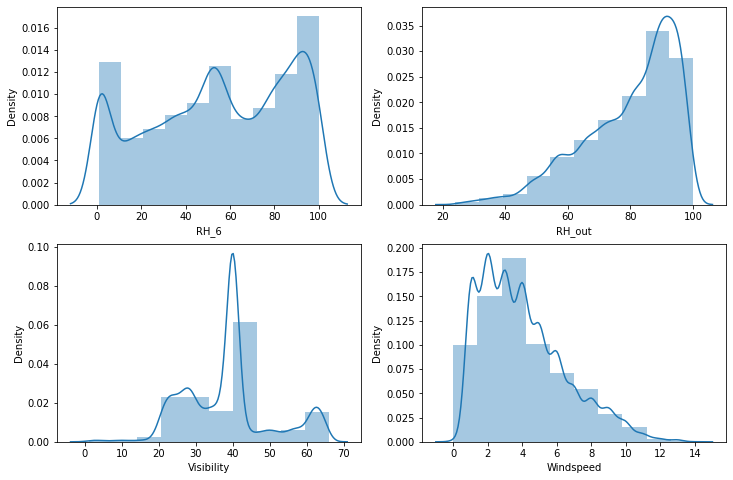

In [ ]:
# focussed displots for RH_6 , RH_out , Visibility , Windspeed due to irregular distribution
f, ax = plt.subplots(2,2,figsize=(12,8))
vis1 = sns.distplot(df["RH_6"],bins=10, ax= ax[0][0])
vis2 = sns.distplot(df["RH_out"],bins=10, ax=ax[0][1])
vis3 = sns.distplot(df["Visibility"],bins=10, ax=ax[1][0])
vis4 = sns.distplot(df["Windspeed"],bins=10, ax=ax[1][1])

C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.9_qbz5n2kfra8p0\LocalCache\local-packages\Python39\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


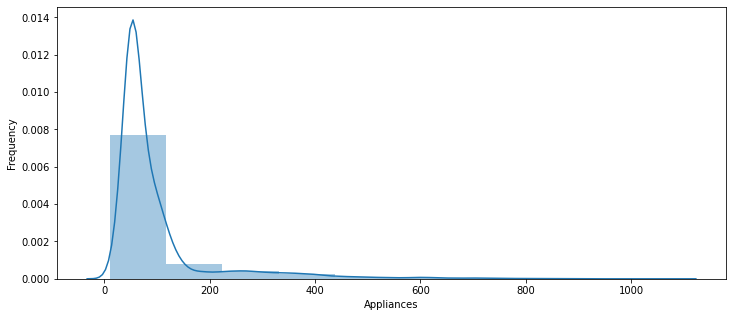

In [ ]:
# Distribution of values in Applainces column
f = plt.figure(figsize=(12,5))
plt.xlabel('Appliance consumption in Wh')
plt.ylabel('Frequency')
sns.distplot(df.Appliances , bins=10 ) ;

Observations 
1. Temperature - All the columns follow normal distribution except T9
2. Humidity - All columns follow normal distribution except RH_6 and RH_out, primarily because these sensors are outside the house 
3. Appliance - This column is positively skewed ; most the values are around mean 100 Wh. There are outliers in this column 
4. Visibility - This column is negatively skewed
5. Windspeed - This column is positively skewed


# Let's standardize the data.

In the following example, the first 17500 rows of the data will be the training dataset, and there remaining will be the validation dataset. Also, setting seed to ensure reproducibility. It is important to scale features before training a neural network. Standardization is a common way of doing this scaling by subtracting the mean and dividing by the standard deviation of each feature. The mean and standard deviation is only computed using the training data

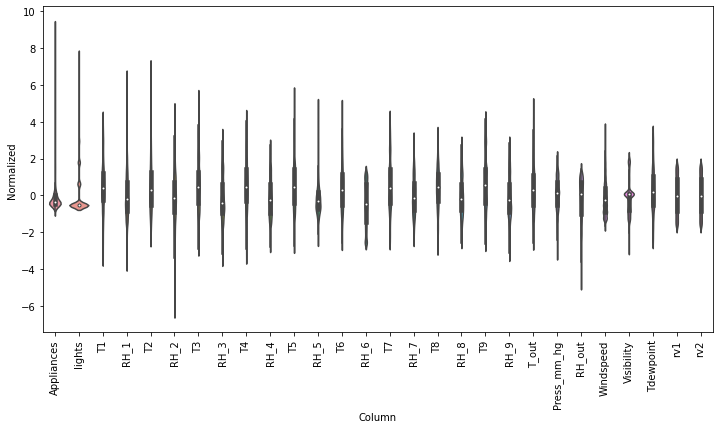

In [ ]:
df_std = (df - train_mean) / train_std
df_std = df_std.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std)
_ = ax.set_xticklabels(df.keys(), rotation=90)

The original dataset contains many features. For simplicity, we will considers only three of the original. The features used are ,

      T1, Temperature in kitchen area, in Celsius
      T2, Temperature in living room area, in Celsius 
      T3, Temperature in laundry room area

To use more features, we can add their names to this list.

In [ ]:
features_considered = ['T1', 'T2', 'T3']

In [ ]:
features = df[features_considered]
features.head()

,T1,T2,T3
0,19.89,19.2,19.79
1,19.89,19.2,19.79
2,19.89,19.2,19.79
3,19.89,19.2,19.79
4,19.89,19.2,19.79


In [ ]:
dataset = features.values
data_mean = dataset[:TRAIN_SPLIT].mean(axis=0)
data_std = dataset[:TRAIN_SPLIT].std(axis=0)

In [ ]:
dataset = (dataset-data_mean)/data_std

# Recurrent neural network

# Single step model

In a single step setup, the model learns to predict a single point in the future based on some history provided. 

The below function performs the same windowing task as below, however, here it samples the past observation based on the step size given.

In [ ]:
def multivariate_data(dataset, target, start_index, end_index, history_size,
                      target_size, step, single_step=False):
    data = []
    labels = []

 

    start_index = start_index + history_size
    if end_index is None:
        end_index = len(dataset) - target_size

 

    for i in range(start_index, end_index):
        indices = range(i-history_size, i, step)
        data.append(dataset[indices])

 

        if single_step:
            labels.append(target[i+target_size])
        else:
            labels.append(target[i:i+target_size])
  
    return np.array(data), np.array(labels)

In [ ]:
past_history = 720
future_target = 72
STEP = 6

x_train_single, y_train_single = multivariate_data(dataset, dataset[:, 1], 0,
                                                   TRAIN_SPLIT, past_history,
                                                   future_target, STEP,
                                                   single_step=True)
x_val_single, y_val_single = multivariate_data(dataset, dataset[:, 1],
                                               TRAIN_SPLIT, None, past_history,
                                               future_target, STEP,
                                               single_step=True)

Let's look at a single data-point.

In [ ]:
print ('Single window of past history : {}'.format(x_train_single[0].shape))

Single window of past history : (120, 3)


We define the batch size as 256 and buffer size as 10,000 to extract single data entity from the dataset using Tensor flow. Then we use this single data point to build a single step model and consecutively add LSTM and Dense layers.

In [ ]:
BATCH_SIZE = 256
BUFFER_SIZE = 10000
train_data_single = tf.data.Dataset.from_tensor_slices((x_train_single, y_train_single))
train_data_single = train_data_single.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_single = tf.data.Dataset.from_tensor_slices((x_val_single, y_val_single))
val_data_single = val_data_single.batch(BATCH_SIZE).repeat()

In [ ]:
single_step_model = tf.keras.models.Sequential()
single_step_model.add(tf.keras.layers.LSTM(32,
                                           input_shape=x_train_single.shape[-2:]))
single_step_model.add(tf.keras.layers.Dense(1))

single_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(), loss='mae')

Let's check out a sample prediction.

In [ ]:
for x, y in val_data_single.take(1):
  print(single_step_model.predict(x).shape)

(256, 1)


In [ ]:
EVALUATION_INTERVAL = 200
EPOCHS = 10
single_step_history = single_step_model.fit(train_data_single, epochs=EPOCHS,
                                            steps_per_epoch=EVALUATION_INTERVAL,
                                            validation_data=val_data_single,
                                            validation_steps=50)

Epoch 1/10
200/200 [==============================] - 22s 102ms/step - loss: 0.4446 - val_loss: 1.1414
Epoch 2/10
200/200 [==============================] - 20s 99ms/step - loss: 0.3551 - val_loss: 1.3579
Epoch 3/10
200/200 [==============================] - 20s 98ms/step - loss: 0.3209 - val_loss: 1.4669
Epoch 4/10
200/200 [==============================] - 20s 101ms/step - loss: 0.3024 - val_loss: 1.6044
Epoch 5/10
200/200 [==============================] - 22s 109ms/step - loss: 0.2835 - val_loss: 1.6307
Epoch 6/10
200/200 [==============================] - 22s 111ms/step - loss: 0.2676 - val_loss: 1.8151
Epoch 7/10
200/200 [==============================] - 38s 188ms/step - loss: 0.2536 - val_loss: 1.8936
Epoch 8/10
200/200 [==============================] - 21s 107ms/step - loss: 0.2412 - val_loss: 2.0167
Epoch 9/10
200/200 [==============================] - 40s 203ms/step - loss: 0.2276 - val_loss: 2.1943
Epoch 10/10
200/200 [==============================] - 25s 123ms/step - los

In [ ]:
def plot_train_history(history, title):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(loss))

  plt.figure()

  plt.plot(epochs, loss, 'b', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title(title)
  plt.legend()

  plt.show()

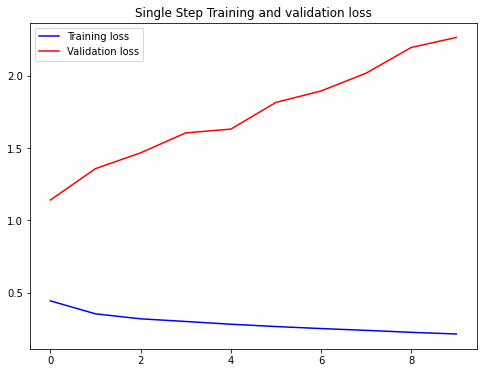

In [ ]:
plot_train_history(single_step_history,
                   'Single Step Training and validation loss')

In [ ]:
def create_time_steps(length):
  return list(range(-length, 0))

In [ ]:
def show_plot(plot_data, delta, title):
  labels = ['History', 'True Future', 'Model Prediction']
  marker = ['.-', 'rx', 'go']
  time_steps = create_time_steps(plot_data[0].shape[0])
  if delta:
    future = delta
  else:
    future = 0

  plt.title(title)
  for i, x in enumerate(plot_data):
    if i:
      plt.plot(future, plot_data[i], marker[i], markersize=10,
               label=labels[i])
    else:
      plt.plot(time_steps, plot_data[i].flatten(), marker[i], label=labels[i])
  plt.legend()
  plt.xlim([time_steps[0], (future+5)*2])
  plt.xlabel('Time-Step')
  return plt

# Predict a single step future


Now that the model is trained, let's make a few sample predictions.Since the goal is to predict the temperature, the plot only displays the past temperature. The prediction is made one day into the future (hence the gap between the history and prediction).

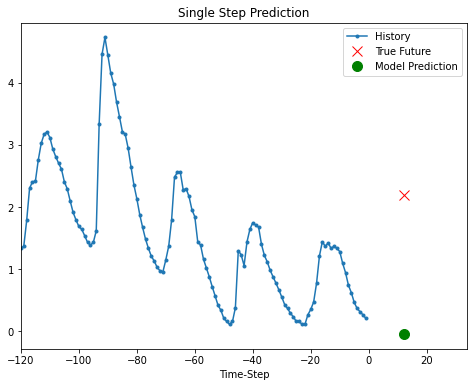

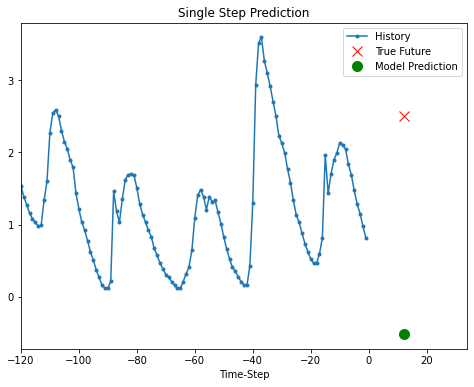

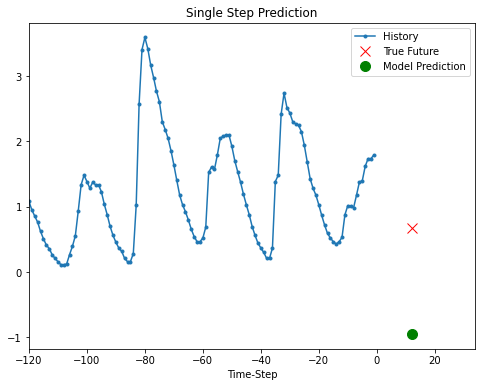

In [ ]:
for x, y in val_data_single.take(3):
  plot = show_plot([x[0][:, 1].numpy(), y[0].numpy(),
                    single_step_model.predict(x)[0]], 12,
                   'Single Step Prediction')
  plot.show()

# Multi-Step model

In a multi-step prediction model, given a past history, the model needs to learn to predict a range of future values. Thus, unlike a single step model, where only a single future point is predicted, a multi-step model predict a sequence of the future.

For the multi-step model, the training data again consists of recordings over the past days sampled every hour. However, here, the model needs to learn to predict the temperature for the next 12 hours. An obversation is taken every 10 minutes. For this task, the dataset needs to be prepared accordingly, thus the first step is just to create it again, but with a different target window.

In [ ]:
future_target = 72
x_train_multi, y_train_multi = multivariate_data(dataset, dataset[:, 1], 0,
                                                 TRAIN_SPLIT, past_history,
                                                 future_target, STEP)
x_val_multi, y_val_multi = multivariate_data(dataset, dataset[:, 1],
                                             TRAIN_SPLIT, None, past_history,
                                             future_target, STEP)

Let's check out a sample data-point.

In [ ]:
print ('Single window of past history : {}'.format(x_train_multi[0].shape))
print ('\n Target temperature to predict : {}'.format(y_train_multi[0].shape))

Single window of past history : (120, 3)

 Target temperature to predict : (72,)


In [ ]:
train_data_multi = tf.data.Dataset.from_tensor_slices((x_train_multi, y_train_multi))
train_data_multi = train_data_multi.cache().shuffle(BUFFER_SIZE).batch(BATCH_SIZE).repeat()

val_data_multi = tf.data.Dataset.from_tensor_slices((x_val_multi, y_val_multi))
val_data_multi = val_data_multi.batch(BATCH_SIZE).repeat()

Plotting a sample data-point.

In [ ]:
def multi_step_plot(history, true_future, prediction):
  plt.figure(figsize=(12, 6))
  num_in = create_time_steps(len(history))
  num_out = len(true_future)

  plt.plot(num_in, np.array(history[:, 1]), label='History')
  plt.plot(np.arange(num_out)/STEP, np.array(true_future), 'bo',
           label='True Future')
  if prediction.any():
    plt.plot(np.arange(num_out)/STEP, np.array(prediction), 'ro',
             label='Predicted Future')
  plt.legend(loc='upper left')
  plt.show()

In this plot and subsequent similar plots, the history and the future data are sampled every hour.

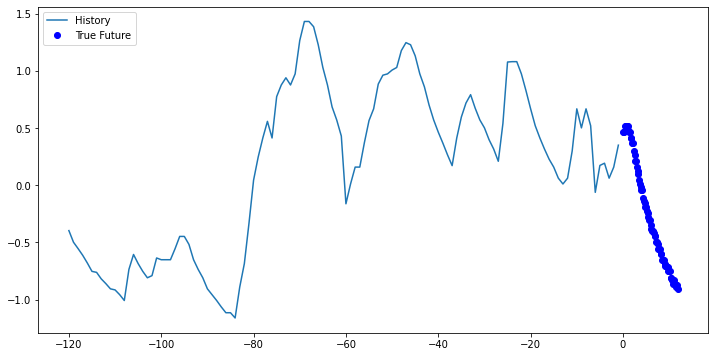

In [ ]:
for x, y in train_data_multi.take(1):
  multi_step_plot(x[0], y[0], np.array([0]))

 Since the task here is a bit more complicated than the previous task, the model now consists of two LSTM layers. Finally, since 72 predictions are made, the dense layer outputs 72 predictions.

In [ ]:
multi_step_model = tf.keras.models.Sequential()
multi_step_model.add(tf.keras.layers.LSTM(32,
                                          return_sequences=True,
                                          input_shape=x_train_multi.shape[-2:]))
multi_step_model.add(tf.keras.layers.LSTM(16, activation='relu'))
multi_step_model.add(tf.keras.layers.Dense(72))

multi_step_model.compile(optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0), loss='mae')

Let's see how the model predicts before it trains.

In [ ]:
for x, y in val_data_multi.take(1):
  print (multi_step_model.predict(x).shape)

(256, 72)


In [ ]:
multi_step_history = multi_step_model.fit(train_data_multi, epochs=EPOCHS,
                                          steps_per_epoch=EVALUATION_INTERVAL,
                                          validation_data=val_data_multi,
                                          validation_steps=50)

Epoch 1/10
200/200 [==============================] - 37s 173ms/step - loss: 0.7643 - val_loss: 0.7811
Epoch 2/10
200/200 [==============================] - 37s 187ms/step - loss: 0.5032 - val_loss: 0.8692
Epoch 3/10
200/200 [==============================] - 40s 198ms/step - loss: 0.3595 - val_loss: 0.7175
Epoch 4/10
200/200 [==============================] - 68s 339ms/step - loss: 0.3083 - val_loss: 0.6987
Epoch 5/10
200/200 [==============================] - 72s 360ms/step - loss: 0.2814 - val_loss: 0.7456
Epoch 6/10
200/200 [==============================] - 70s 350ms/step - loss: 0.2615 - val_loss: 0.7822
Epoch 7/10
200/200 [==============================] - 51s 254ms/step - loss: 0.2442 - val_loss: 0.7942
Epoch 8/10
200/200 [==============================] - 69s 343ms/step - loss: 0.2293 - val_loss: 0.8069
Epoch 9/10
200/200 [==============================] - 58s 290ms/step - loss: 0.2163 - val_loss: 0.7748
Epoch 10/10
200/200 [==============================] - 48s 237ms/step - l

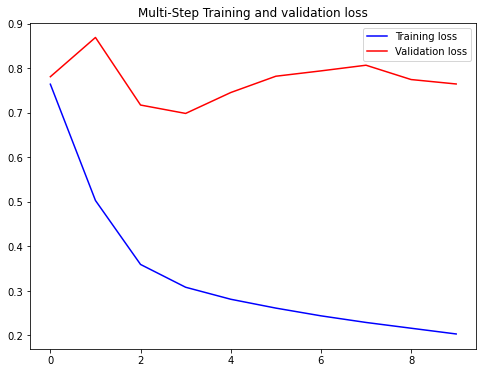

In [ ]:
plot_train_history(multi_step_history, 'Multi-Step Training and validation loss')

# Predict a multi-step future¶


Let's now have a look at how well your network has learnt to predict the future.

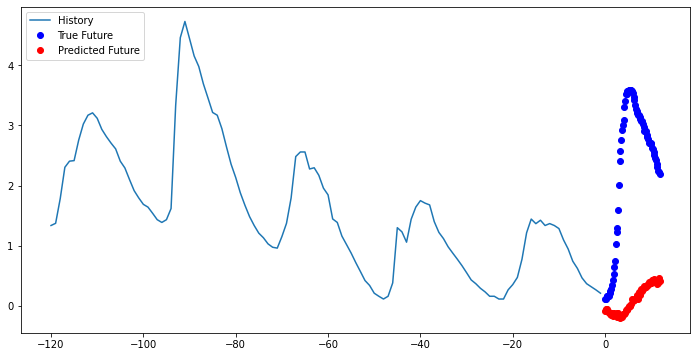

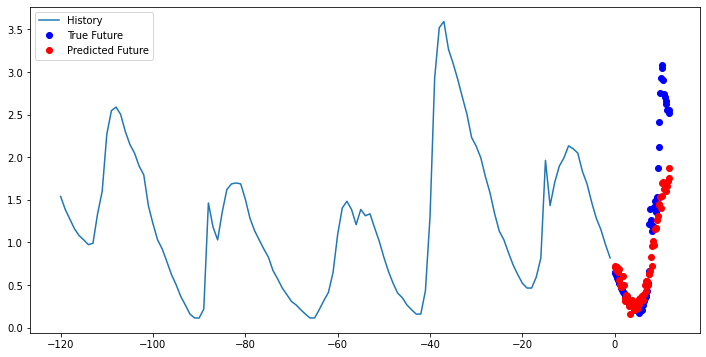

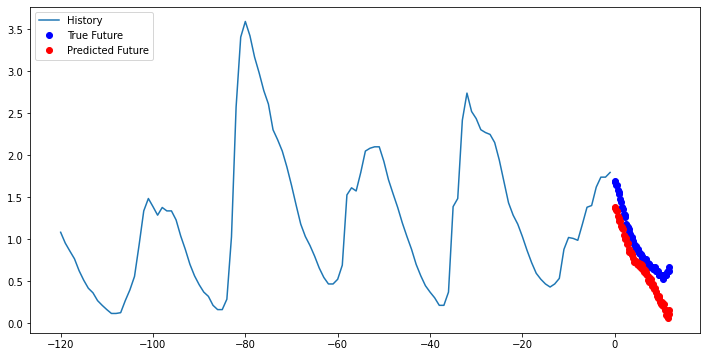

In [ ]:
for x, y in val_data_multi.take(3):
  multi_step_plot(x[0], y[0], multi_step_model.predict(x)[0])

From the above three charts, we can see how our system is performing/Predicting for T1, T2 and T3. Red line being our predicted future and Blue showing the true future.
Thus we are able to design and train an "optimal" temporal processing network that can model the time-series properties of the dataset.

# Hyper Parameter Tuning

In [ ]:
from sklearn.ensemble import ExtraTreesRegressor

In [ ]:
# Remove Appliances column from traininig set

train_X =  df.drop(['Appliances'] , axis=1)
train_y = df['Appliances']

test_X =  df.drop(['Appliances'] , axis=1)
test_y = df['Appliances']

In [ ]:
train_X

,lights,T1,RH_1,T2,RH_2,T3,RH_3,T4,RH_4,T5,...,T9,RH_9,T_out,Press_mm_hg,RH_out,Windspeed,Visibility,Tdewpoint,rv1,rv2
0,30,19.890000,47.596667,19.200000,44.790000,19.790000,44.730000,19.000000,45.566667,17.166667,...,17.033333,45.5300,6.600000,733.5,92.000000,7.000000,63.000000,5.300000,13.275433,13.275433
1,30,19.890000,46.693333,19.200000,44.722500,19.790000,44.790000,19.000000,45.992500,17.166667,...,17.066667,45.5600,6.483333,733.6,92.000000,6.666667,59.166667,5.200000,18.606195,18.606195
2,30,19.890000,46.300000,19.200000,44.626667,19.790000,44.933333,18.926667,45.890000,17.166667,...,17.000000,45.5000,6.366667,733.7,92.000000,6.333333,55.333333,5.100000,28.642668,28.642668
3,40,19.890000,46.066667,19.200000,44.590000,19.790000,45.000000,18.890000,45.723333,17.166667,...,17.000000,45.4000,6.250000,733.8,92.000000,6.000000,51.500000,5.000000,45.410389,45.410389
4,40,19.890000,46.333333,19.200000,44.530000,19.790000,45.000000,18.890000,45.530000,17.200000,...,17.000000,45.4000,6.133333,733.9,92.000000,5.666667,47.666667,4.900000,10.084097,10.084097
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19730,0,25.566667,46.560000,25.890000,42.025714,27.200000,41.163333,24.700000,45.590000,23.200000,...,23.200000,46.7900,22.733333,755.2,55.666667,3.333333,23.666667,13.333333,43.096812,43.096812
19731,0,25.500000,46.500000,25.754000,42.080000,27.133333,41.223333,24.700000,45.590000,23.230000,...,23.200000,46.7900,22.600000,755.2,56.000000,3.500000,24.500000,13.300000,49.282940,49.282940
19732,10,25.500000,46.596667,25.628571,42.768571,27.050000,41.690000,24.700000,45.730000,23.230000,...,23.200000,46.7900,22.466667,755.2,56.333333,3.666667,25.333333,13.266667,29.199117,29.199117
19733,10,25.500000,46.990000,25.414000,43.036000,26.890000,41.290000,24.700000,45.790000,23.200000,...,23.200000,46.8175,22.333333,755.2,56.666667,3.833333,26.166667,13.233333,6.322784,6.322784


In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = [{
              'max_depth': [80, 150, 200,250],
              'n_estimators' : [100,150,200,250],
              'max_features': ["auto", "sqrt", "log2"]
            }]
reg = ExtraTreesRegressor(random_state=40)
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = reg, param_grid = param_grid, cv = 5, n_jobs = -1 , scoring='r2' , verbose=2)
grid_search.fit(train_X, train_y)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=ExtraTreesRegressor(random_state=40), n_jobs=-1,
             param_grid=[{'max_depth': [80, 150, 200, 250],
                          'max_features': ['auto', 'sqrt', 'log2'],
                          'n_estimators': [100, 150, 200, 250]}],
             scoring='r2', verbose=2)

In [ ]:
# Tuned parameter set
grid_search.best_params_

{'max_depth': 80, 'max_features': 'log2', 'n_estimators': 200}

In [ ]:
# Best possible parameters for ExtraTreesRegressor
grid_search.best_estimator_

ExtraTreesRegressor(max_depth=80, max_features='log2', n_estimators=200,
                    random_state=40)

In [ ]:
# R2 score on training set with tuned parameters

grid_search.best_estimator_.score(train_X,train_y)

0.9999997611601407

In [ ]:
# R2 score on test set with tuned parameters
grid_search.best_estimator_.score(test_X,test_y)

0.9999997611601407

In [ ]:
from sklearn.metrics import mean_squared_error


In [ ]:
# RMSE score on test set with tuned parameters

np.sqrt(mean_squared_error(test_y, grid_search.best_estimator_.predict(test_X)))

0.050103921029810664

### Observations

Based on parameter tunning step we can see that 

1. Best possible parameter combination are - 'max_depth': 80, 'max_features': 'sqrt', 'n_estimators': 200

    
2. Training set  R2 score of 1.0 may be signal of overfitting on training set 


3. Test set R2 score is 0.63 improvement over 0.57 achieved using untuned model


4. Test set RMSE score is 0.60 improvement over 0.65 achieved using untuned model 